# Problem Statement
Problem goes here

# Import Libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras

# Import Dataset

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Customer-Churning/CustomerChurn_dataset.csv")

# Exploratory Data Analysis

In [8]:
df.drop(['customerID'], axis=1, inplace=True)
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
print("The shape of the dataset is: ", df.shape)

The shape of the dataset is:  (7043, 20)


In [10]:
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female             0     Yes         No       1           No   
1    Male             0      No         No      34          Yes   
2    Male             0      No         No       2          Yes   
3    Male             0      No         No      45           No   
4  Female             0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Findings:
1. There are no null values so there is no need for imputation.
2. Churn is the target value.
3. There are 18 non-numerical attributes and 3 numerical attributes.

In [12]:
df.describe(include='all').T

count unique               top    freq         mean  \
gender              7043      2              Male    3555          NaN   
SeniorCitizen     7043.0    2.0               0.0  5901.0          NaN   
Partner             7043      2                No    3641          NaN   
Dependents          7043      2                No    4933          NaN   
tenure            7043.0    NaN               NaN     NaN    32.371149   
PhoneService        7043      2               Yes    6361          NaN   
MultipleLines       7043      3                No    3390          NaN   
InternetService     7043      3       Fiber optic    3096          NaN   
OnlineSecurity      7043      3                No    3498          NaN   
OnlineBackup        7043      3                No    3088          NaN   
DeviceProtection    7043      3                No    3095          NaN   
TechSupport         7043      3                No    3473          NaN   
StreamingTV         7043      3                No    2810          NaN   
StreamingMovies     7043      3                No    2785          NaN   
Contract            7043      3    Month-to-month    3875          NaN   
PaperlessBilling    7043      2               Yes    4171          NaN   
PaymentMethod       7043      4  Electronic check    2365          NaN   
MonthlyCharges    7043.0    NaN               NaN     NaN    64.761692   
TotalCharges      7032.0    NaN               NaN     NaN  2283.300441   
Churn               7043      2                No    5174          NaN   

                          std    min     25%       50%        75%     max  
gender                    NaN    NaN     NaN       NaN        NaN     NaN  
SeniorCitizen             NaN    NaN     NaN       NaN        NaN     NaN  
Partner                   NaN    NaN     NaN       NaN        NaN     NaN  
Dependents                NaN    NaN     NaN       NaN        NaN     NaN  
tenure              24.559481    0.0     9.0      29.0       55.0    72.0  
PhoneService              NaN    NaN     NaN       NaN        NaN     NaN  
MultipleLines             NaN    NaN     NaN       NaN        NaN     NaN  
InternetService           NaN    NaN     NaN       NaN        NaN     NaN  
OnlineSecurity            NaN    NaN     NaN       NaN        NaN     NaN  
OnlineBackup              NaN    NaN     NaN       NaN        NaN     NaN  
DeviceProtection          NaN    NaN     NaN       NaN        NaN     NaN  
TechSupport               NaN    NaN     NaN       NaN        NaN     NaN  
StreamingTV               NaN    NaN     NaN       NaN        NaN     NaN  
StreamingMovies           NaN    NaN     NaN       NaN        NaN     NaN  
Contract                  NaN    NaN     NaN       NaN        NaN     NaN  
PaperlessBilling          NaN    NaN     NaN       NaN        NaN     NaN  
PaymentMethod             NaN    NaN     NaN       NaN        NaN     NaN  
MonthlyCharges      30.090047  18.25    35.5     70.35      89.85  118.75  
TotalCharges      2266.771362   18.8  401.45  1397.475  3794.7375  8684.8  
Churn                     NaN    NaN     NaN       NaN        NaN     NaN

In [13]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Exploring type Object

In [14]:
# objects = df.select_dtypes(exclude=["number"])
objects = [i for i in df.columns if df[i].dtype=='O']
print("There are", len(objects), "object attributes")
print("These are:", objects)

There are 17 object attributes
These are: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [15]:
df[objects].head()

gender SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female             0     Yes         No           No  No phone service   
1    Male             0      No         No          Yes                No   
2    Male             0      No         No          Yes                No   
3    Male             0      No         No           No  No phone service   
4  Female             0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod Churn  
0           Electronic check    No  
1               Mailed check    No  
2               Mailed check   Yes  
3  Bank transfer (automatic)    No  
4           Electronic check   Yes

In [16]:
for i in objects:
    print(df[i].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                

## Exploring Target Attribute

In [17]:
# Check for any null values
df['Churn'].isnull().sum()

0

In [18]:
# Number of distinct values
df['Churn'].nunique()

2

In [19]:
#View the unique values in Churn
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
# Check how many of each unique value there are
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [21]:
# Check how many of each unique value there are
df['Churn'].value_counts()/len(df)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Churn Share')

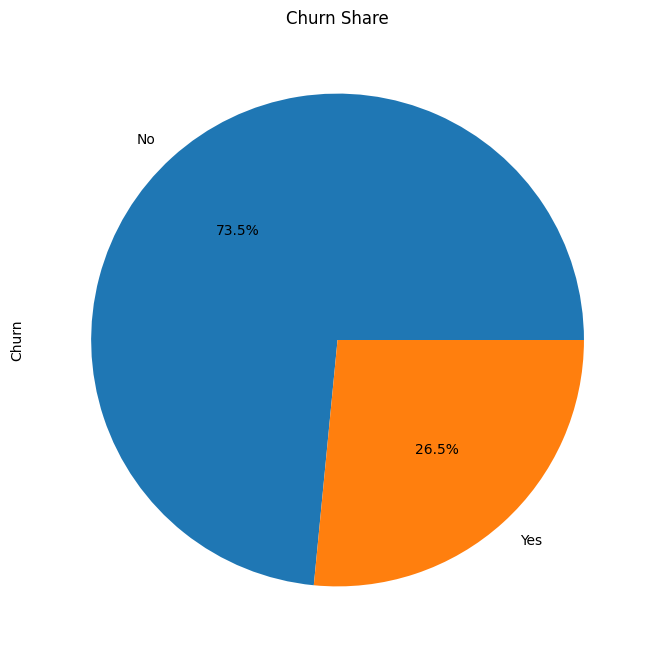

In [22]:
ax = plt.subplots(figsize=(18,8))

ax = df['Churn'].value_counts().plot.pie(autopct='%1.1f%%')
ax.set_title("Churn Share")

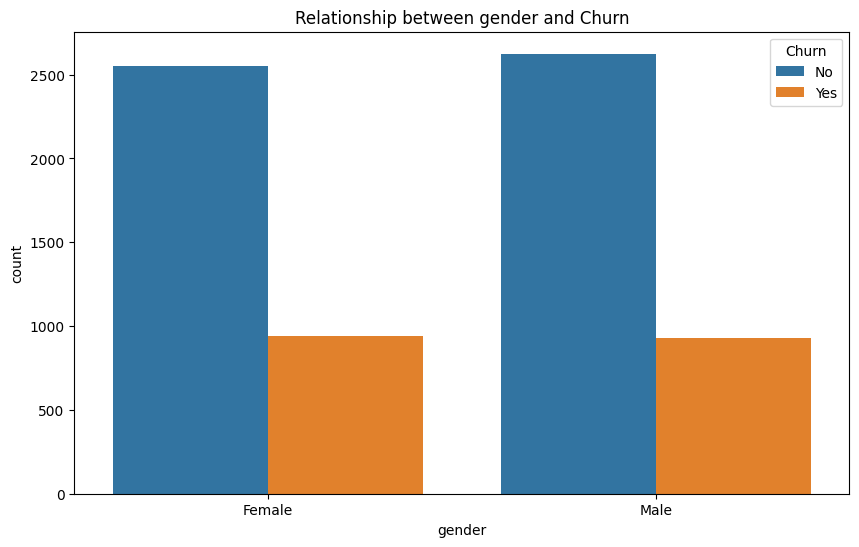

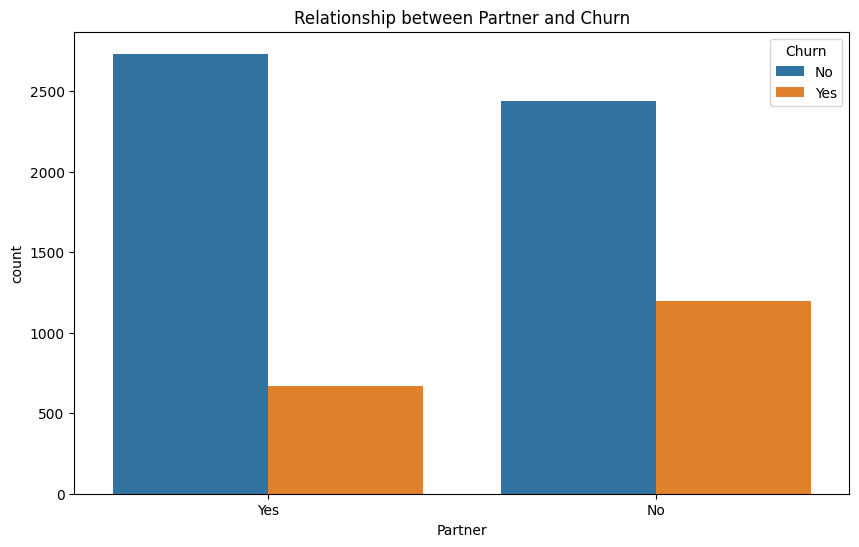

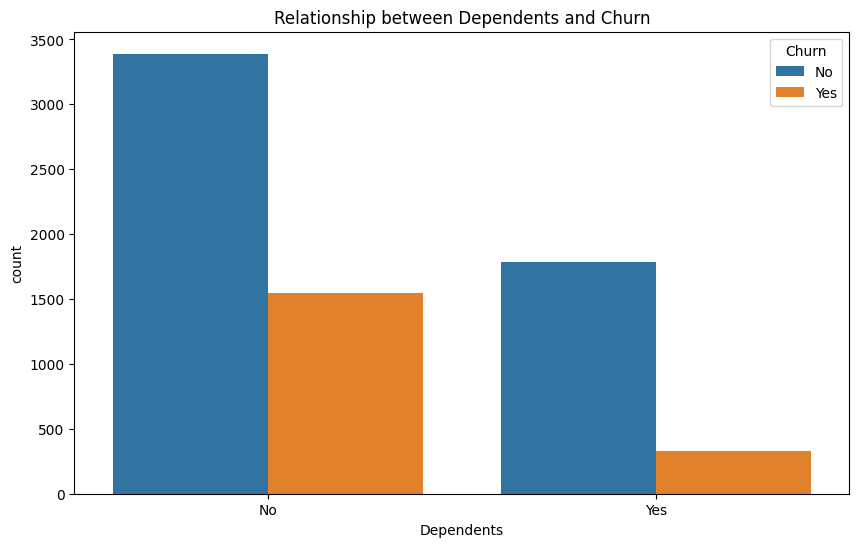

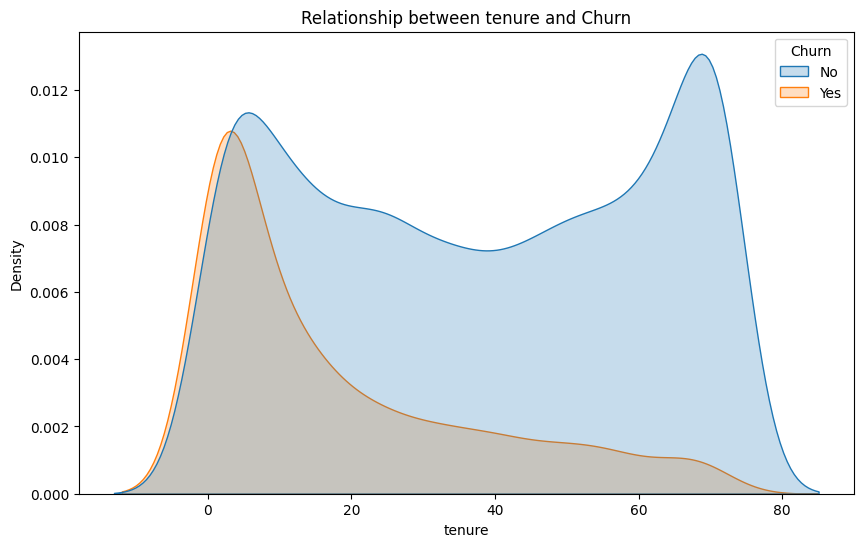

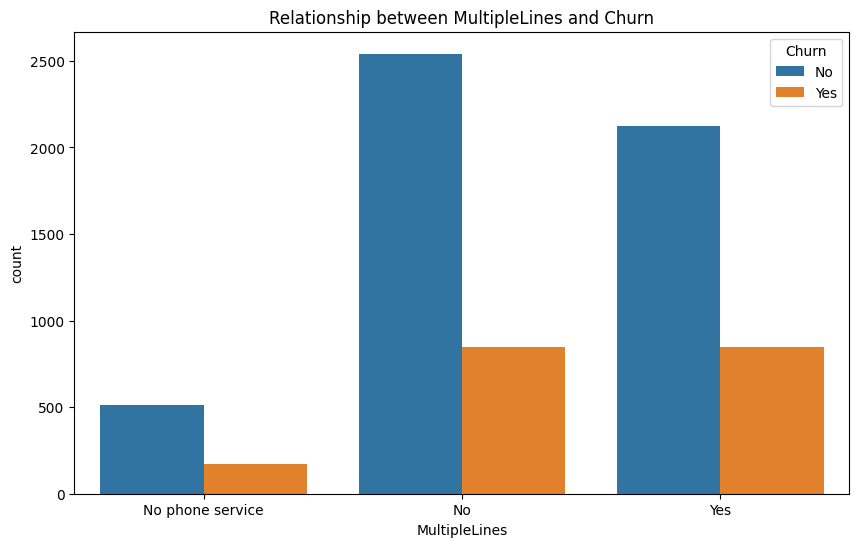

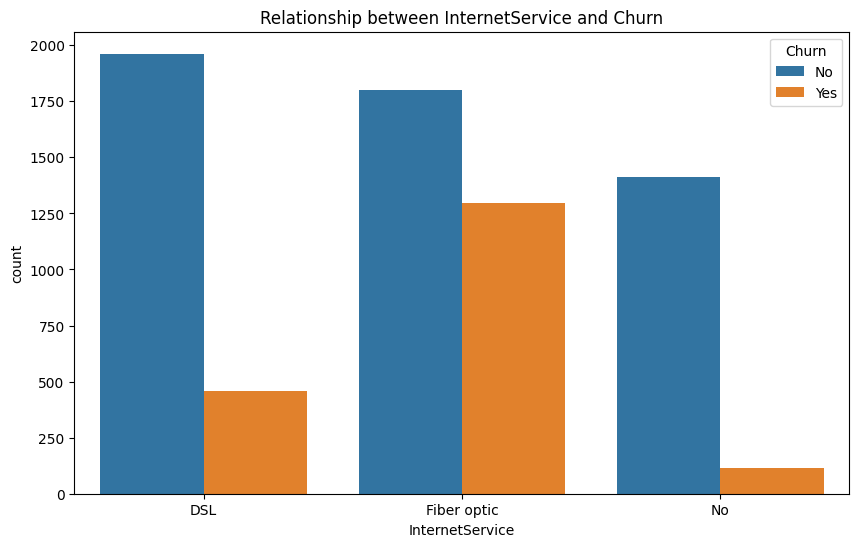

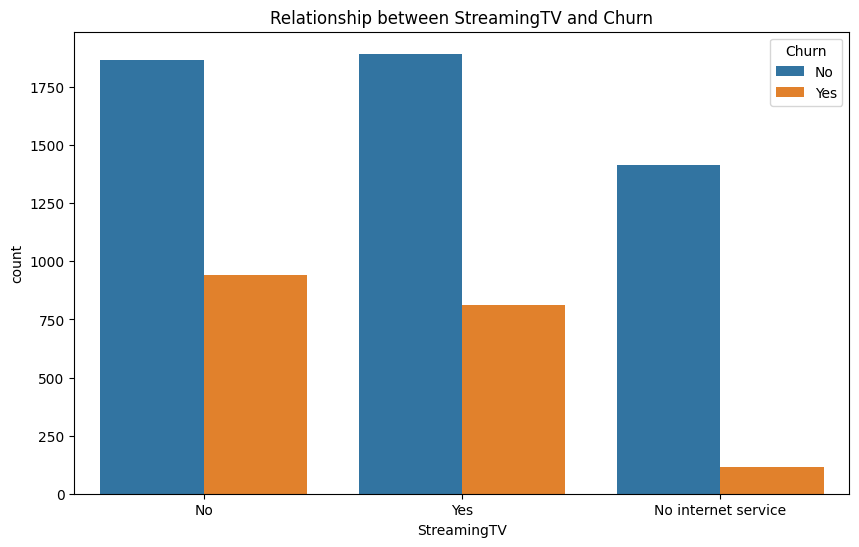

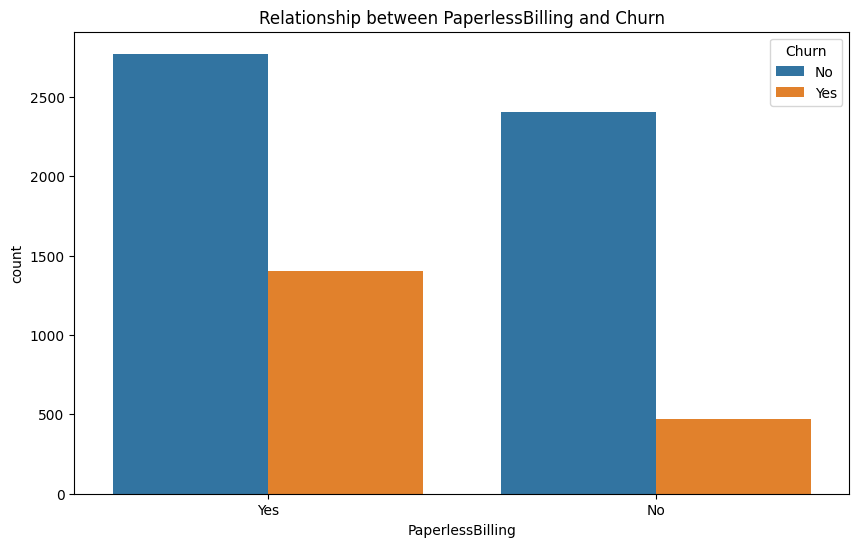

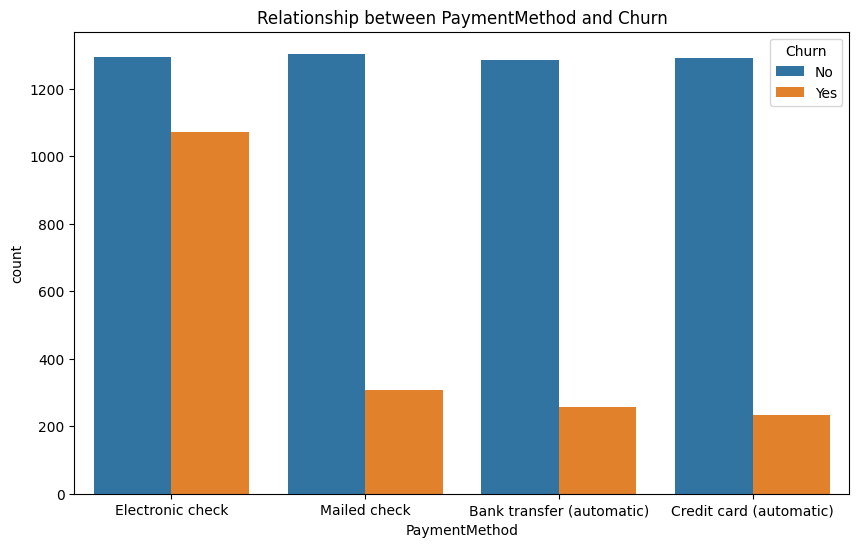

In [23]:
# List of attributes excluding the target 'Churn'
attributes = df.columns[df.columns != 'Churn']

# Plotting the relationship between each attribute and 'Churn'
for attribute in attributes:
    if df[attribute].dtype == 'object':
        # Categorical attributes
        plt.figure(figsize=(10, 6))
        sns.countplot(x=attribute, hue='Churn', data=df)
        plt.title(f'Relationship between {attribute} and Churn')
        plt.show()
    else:
        # Numerical attributes
        plt.figure(figsize=(10, 6))
        sns.kdeplot(data=df, x=attribute, hue='Churn', fill=True)
        plt.title(f'Relationship between {attribute} and Churn')
        plt.show()

## Exploring type Number

In [24]:
numbers = [i for i in df.columns if df[i].dtype!='O']
print("There are", len(numbers), "numerical attributes")
print("These are:", numbers)

There are 3 numerical attributes
These are: ['tenure', 'MonthlyCharges', 'TotalCharges']


In [25]:
df[numbers].head()

tenure  MonthlyCharges  TotalCharges
0       1           29.85         29.85
1      34           56.95       1889.50
2       2           53.85        108.15
3      45           42.30       1840.75
4       2           70.70        151.65

In [26]:
df[numbers].isnull().sum()

tenure             0
MonthlyCharges     0
TotalCharges      11
dtype: int64

In [27]:
imputer = SimpleImputer(strategy='mean')

imputer.fit(df['TotalCharges'].values.reshape(-1, 1))
transformed = imputer.transform(df['TotalCharges'].values.reshape(-1, 1))
df['TotalCharges'] = transformed

In [28]:
df[numbers].isnull().sum()

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [29]:
for i in numbers:
    print(i,":",df[i].nunique(), "unique values")

tenure : 73 unique values
MonthlyCharges : 1585 unique values
TotalCharges : 6531 unique values


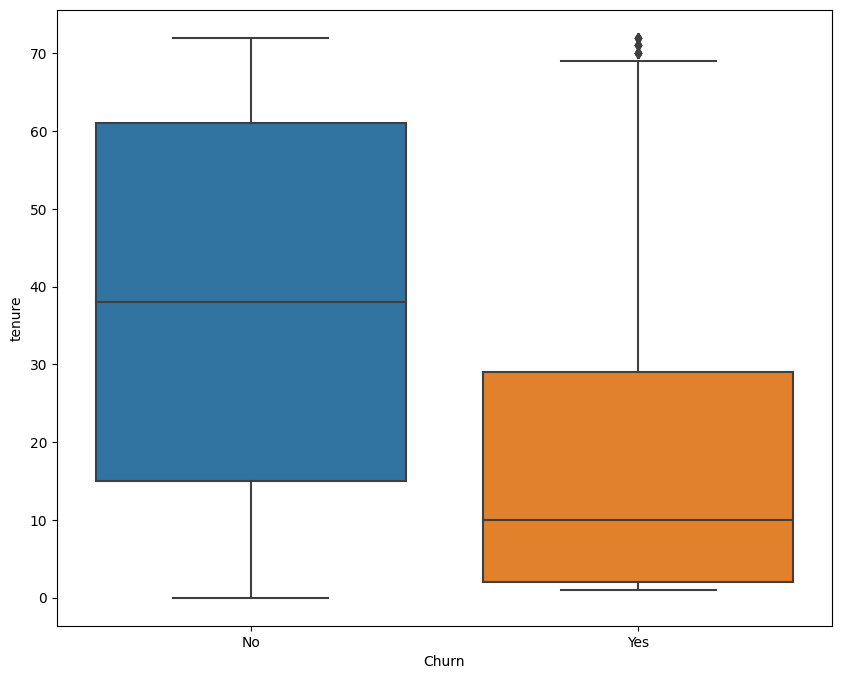

In [30]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Churn", y="tenure", data=df)
ax.set_title("")
plt.show()

In [31]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
ax.set_title("")
plt.show()

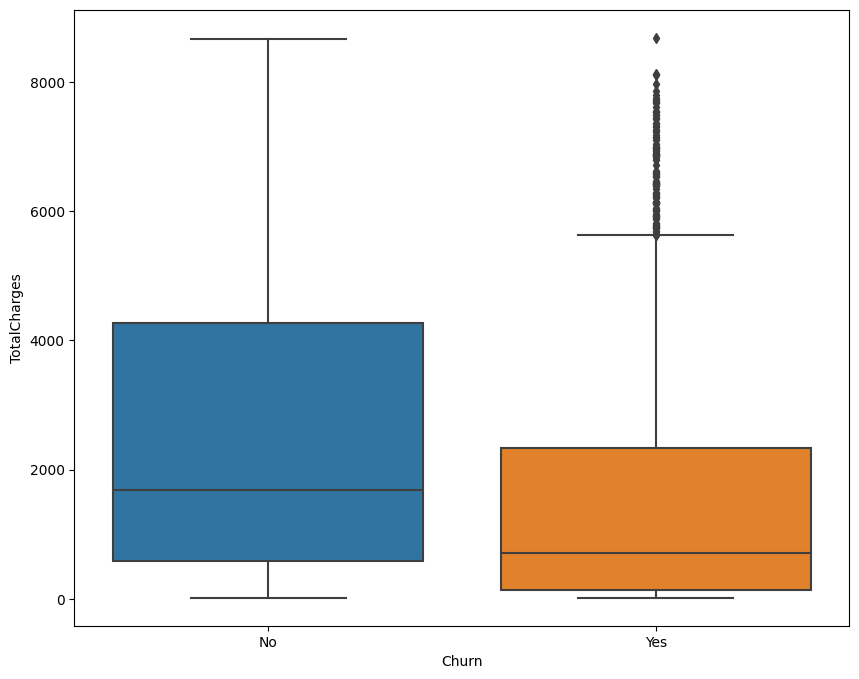

In [32]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Churn", y="TotalCharges", data=df)
ax.set_title("")
plt.show()

In [33]:
df

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female             0     Yes         No       1           No   
1       Male             0      No         No      34          Yes   
2       Male             0      No         No       2          Yes   
3       Male             0      No         No      45           No   
4     Female             0      No         No       2          Yes   
...      ...           ...     ...        ...     ...          ...   
7038    Male             0     Yes        Yes      24          Yes   
7039  Female             0     Yes        Yes      72          Yes   
7040  Female             0     Yes        Yes      11           No   
7041    Male             1     Yes         No       4          Yes   
7042    Male             0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7043 rows x 20 columns]

# Feature Enginering

In [34]:
categorical = [col for col in df.columns if df[col].dtypes == 'O']

df[categorical].isnull().mean()

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
Churn               0.0
dtype: float64

In [35]:
numerical = [col for col in df.columns if df[col].dtypes != 'O']
df[numerical].isnull().mean()

tenure            0.0
MonthlyCharges    0.0
TotalCharges      0.0
dtype: float64

In [36]:
# import category_encoders as ce
#Encode
label = LabelEncoder()

columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                         'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                         'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for i in columns:
    df[i] = label.fit_transform(df[i])
df
#

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              2           29.85         29.85      0  
1                    0              3           56.95       1889.50      0  
2                    1              3           53.85        108.15      1  
3                    0              0           42.30       1840.75      0  
4                    1              2           70.70        151.65      1  
...                ...            ...             ...           ...    ...  
7038                 1              3           84.80       1990.50      0  
7039                 1              1          103.20       7362.90      0  
7040                 1              2           29.60        346.45      0  
7041                 1              3           74.40        306.60      1  
7042                 1              0          105.65       6844.50      0  

[7043 rows x 20 columns]

# Scaling

In [37]:
columns_for_scaling = df.columns

In [38]:
scaler = StandardScaler()

numerical_columns = ['tenure','MonthlyCharges','TotalCharges']
df_to_scale = df[numerical]
df_scaled= scaler.fit_transform(df_to_scale)
df_scaled = pd.DataFrame(df_scaled, columns=numerical_columns)

for i in numerical_columns:
    df.drop([i], axis=1, inplace=True)
df = pd.concat([df, df_scaled], axis=1)
df

gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
0          0              0        1           0             0              1   
1          1              0        0           0             1              0   
2          1              0        0           0             1              0   
3          1              0        0           0             0              1   
4          0              0        0           0             1              0   
...      ...            ...      ...         ...           ...            ...   
7038       1              0        1           1             1              2   
7039       0              0        1           1             1              2   
7040       0              0        1           1             0              1   
7041       1              1        1           0             1              2   
7042       1              0        0           0             1              0   

      InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                   0               0             2                 0   
1                   0               2             0                 2   
2                   0               2             2                 0   
3                   0               2             0                 2   
4                   1               0             0                 0   
...               ...             ...           ...               ...   
7038                0               2             0                 2   
7039                1               0             2                 2   
7040                0               2             0                 0   
7041                1               0             0                 0   
7042                1               2             0                 2   

      TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0               0            0                0         0                 1   
1               0            0                0         1                 0   
2               0            0                0         0                 1   
3               2            0                0         1                 0   
4               0            0                0         0                 1   
...           ...          ...              ...       ...               ...   
7038            2            2                2         1                 1   
7039            0            2                2         1                 1   
7040            0            0                0         0                 1   
7041            0            0                0         0                 1   
7042            2            2                2         2                 1   

      PaymentMethod  Churn    tenure  MonthlyCharges  TotalCharges  
0                 2      0 -1.277445       -1.160323     -0.994971  
1                 3      0  0.066327       -0.259629     -0.173876  
2                 3      1 -1.236724       -0.362660     -0.960399  
3                 0      0  0.514251       -0.746535     -0.195400  
4                 2      1 -1.236724        0.197365     -0.941193  
...             ...    ...       ...             ...           ...  
7038              3      0 -0.340876        0.665992     -0.129281  
7039              1      0  1.613701        1.277533      2.242808  
7040              2      0 -0.870241       -1.168632     -0.855182  
7041              3      1 -1.155283        0.320338     -0.872777  
7042              0      0  1.369379        1.358961      2.013917  

[7043 rows x 20 columns]

# Feature and Target Selection

In [39]:
y = df["Churn"]
X = df.drop(["Churn"], axis=1)

# Splitting

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train.shape, X_test.shape

((5634, 19), (1409, 19))

# Random Forest

In [42]:
rfr = RandomForestClassifier(n_estimators=10)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

print(accuracy_score(y_test, y_pred))



0.7927608232789212


In [43]:
rfr_100 = RandomForestClassifier(n_estimators=100, random_state= 42)

rfr_100.fit(X_train, y_train)
y_pred_100 = rfr_100.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7927608232789212


In [44]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

TotalCharges        0.189062
MonthlyCharges      0.181844
tenure              0.157678
Contract            0.078741
PaymentMethod       0.051128
OnlineSecurity      0.050693
TechSupport         0.031650
gender              0.028648
OnlineBackup        0.027732
InternetService     0.027298
PaperlessBilling    0.025878
Partner             0.023667
DeviceProtection    0.022433
MultipleLines       0.022420
SeniorCitizen       0.021044
Dependents          0.020423
StreamingMovies     0.017316
StreamingTV         0.017057
PhoneService        0.005288
dtype: float64

In [46]:
X_train = X_train.drop(['PhoneService'], axis=1)
X_test = X_test.drop(['PhoneService'], axis=1)

In [47]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7906316536550745


# Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)

print(matrix)

[[939  97]
 [198 175]]


# Cross Validation and Grid Search

In [49]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#      'n_estimators': [10, 50, 100, 150],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 4, 8],
# }

# clf = RandomForestClassifier()
# grid_search = GridSearchCV(
#     clf, param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy'
# )

# grid_search.fit(X_train, y_train)

# # Print the best parameters and corresponding accuracy
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Accuracy: ", grid_search.best_score_)

# # Evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# test_accuracy = best_model.score(X_test, y_test)
# print("Test Accuracy: ", test_accuracy)

# KERAS MULTI LAYER PERCEPTRON USING THE FUNCTIONAL API

In [50]:
#Importing necessary libraries
import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam, RMSprop
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import tensorflow as tf


In [51]:
# Xtrain, X_test, ytrain, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

In [52]:
input_nodes = Input(shape=(X_train.shape[1],))
hidden1 = Dense(128, activation='relu')(input_nodes)
hidden2 = Dense(64, activation='relu')(hidden1)
hidden3 = Dense(32, activation='relu')(hidden2)
hidden4 = Dense(16, activation='relu')(hidden3)
output_layer = Dense(1, activation='sigmoid')(hidden4)
model = Model(inputs=input_nodes, outputs=output_layer)

In [53]:
stopping = EarlyStopping(monitor='value_loss', patience=10, mode='min', restore_best_weights=True)

In [54]:
model.compile(optimizer=RMSprop(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [55]:

Xtrain = np.array(X_train, dtype=np.float32)
ytrain = np.array(y_train, dtype=np.float32)
model.fit(Xtrain, y_train, epochs=150, batch_size=50, validation_data=(X_val, y_val), callbacks=[stopping])

Epoch 1/150
113/113 [==============================] - ETA: 0s - loss: 0.4652 - accuracy: 0.7691

113/113 [==============================] - 1s 3ms/step - loss: 0.4652 - accuracy: 0.7691 - val_loss: 0.4082 - val_accuracy: 0.8066
Epoch 2/150
 78/113 [===================>..........] - ETA: 0s - loss: 0.4411 - accuracy: 0.7844

113/113 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.7882 - val_loss: 0.4260 - val_accuracy: 0.7968
Epoch 3/150
 77/113 [===================>..........] - ETA: 0s - loss: 0.4383 - accuracy: 0.7886

113/113 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.7920 - val_loss: 0.4075 - val_accuracy: 0.8075
Epoch 4/150
 85/113 [=====================>........] - ETA: 0s - loss: 0.4340 - accuracy: 0.7948

113/113 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.7952 - val_loss: 0.4216 - val_accuracy: 0.8092
Epoch 5/150
110/113 [============================>.] - ETA: 0s - loss: 0.4256 - accuracy: 0.7995

113/113 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.7991 - val_loss: 0.4074 - val_accuracy: 0.8075
Epoch 6/150
 95/113 [========================>.....] - ETA: 0s - loss: 0.4217 - accuracy: 0.8027

113/113 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8007 - val_loss: 0.4142 - val_accuracy: 0.8128
Epoch 7/150
100/113 [=========================>....] - ETA: 0s - loss: 0.4196 - accuracy: 0.8076

113/113 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.8042 - val_loss: 0.4197 - val_accuracy: 0.7986
Epoch 8/150
 94/113 [=======================>......] - ETA: 0s - loss: 0.4237 - accuracy: 0.7985

113/113 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8019 - val_loss: 0.4182 - val_accuracy: 0.8083
Epoch 9/150
 91/113 [=======================>......] - ETA: 0s - loss: 0.4174 - accuracy: 0.8024

113/113 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8019 - val_loss: 0.4166 - val_accuracy: 0.8039
Epoch 10/150
 86/113 [=====================>........] - ETA: 0s - loss: 0.4132 - accuracy: 0.8121

113/113 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8115 - val_loss: 0.4568 - val_accuracy: 0.8021
Epoch 11/150
 92/113 [=======================>......] - ETA: 0s - loss: 0.4115 - accuracy: 0.8063

113/113 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8058 - val_loss: 0.4293 - val_accuracy: 0.8128
Epoch 12/150
 88/113 [======================>.......] - ETA: 0s - loss: 0.4144 - accuracy: 0.8050

113/113 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8087 - val_loss: 0.4790 - val_accuracy: 0.8030
Epoch 13/150
 89/113 [======================>.......] - ETA: 0s - loss: 0.4074 - accuracy: 0.8126

113/113 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8111 - val_loss: 0.4253 - val_accuracy: 0.8083
Epoch 14/150
 91/113 [=======================>......] - ETA: 0s - loss: 0.4021 - accuracy: 0.8103

113/113 [==============================] - 0s 3ms/step - loss: 0.4024 - accuracy: 0.8110 - val_loss: 0.4349 - val_accuracy: 0.8066
Epoch 15/150
109/113 [===========================>..] - ETA: 0s - loss: 0.4042 - accuracy: 0.8099

113/113 [==============================] - 0s 3ms/step - loss: 0.4035 - accuracy: 0.8103 - val_loss: 0.4318 - val_accuracy: 0.7853
Epoch 16/150
 85/113 [=====================>........] - ETA: 0s - loss: 0.3957 - accuracy: 0.8176

113/113 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8151 - val_loss: 0.4269 - val_accuracy: 0.7986
Epoch 17/150
108/113 [===========================>..] - ETA: 0s - loss: 0.3991 - accuracy: 0.8141

113/113 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8138 - val_loss: 0.4365 - val_accuracy: 0.7959
Epoch 18/150
108/113 [===========================>..] - ETA: 0s - loss: 0.3977 - accuracy: 0.8154

113/113 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.8152 - val_loss: 0.4274 - val_accuracy: 0.8012
Epoch 19/150
 91/113 [=======================>......] - ETA: 0s - loss: 0.3847 - accuracy: 0.8204

113/113 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8211 - val_loss: 0.4450 - val_accuracy: 0.8075
Epoch 20/150
 79/113 [===================>..........] - ETA: 0s - loss: 0.3824 - accuracy: 0.8185

113/113 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8172 - val_loss: 0.4382 - val_accuracy: 0.7959
Epoch 21/150
110/113 [============================>.] - ETA: 0s - loss: 0.3834 - accuracy: 0.8198

113/113 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.8188 - val_loss: 0.4502 - val_accuracy: 0.7897
Epoch 22/150
 80/113 [====================>.........] - ETA: 0s - loss: 0.3842 - accuracy: 0.8175

113/113 [==============================] - 0s 2ms/step - loss: 0.3854 - accuracy: 0.8198 - val_loss: 0.4292 - val_accuracy: 0.8004
Epoch 23/150
 81/113 [====================>.........] - ETA: 0s - loss: 0.3804 - accuracy: 0.8227

113/113 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8218 - val_loss: 0.4297 - val_accuracy: 0.7995
Epoch 24/150
 83/113 [=====================>........] - ETA: 0s - loss: 0.3672 - accuracy: 0.8263

113/113 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8241 - val_loss: 0.4605 - val_accuracy: 0.7862
Epoch 25/150
 83/113 [=====================>........] - ETA: 0s - loss: 0.3735 - accuracy: 0.8277

113/113 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8293 - val_loss: 0.4836 - val_accuracy: 0.8048
Epoch 26/150
 76/113 [===================>..........] - ETA: 0s - loss: 0.3638 - accuracy: 0.8324

113/113 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8340 - val_loss: 0.4452 - val_accuracy: 0.7959
Epoch 27/150
 80/113 [====================>.........] - ETA: 0s - loss: 0.3631 - accuracy: 0.8322

113/113 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8305 - val_loss: 0.5058 - val_accuracy: 0.7959
Epoch 28/150
110/113 [============================>.] - ETA: 0s - loss: 0.3665 - accuracy: 0.8331

113/113 [==============================] - 0s 2ms/step - loss: 0.3649 - accuracy: 0.8335 - val_loss: 0.4939 - val_accuracy: 0.7959
Epoch 29/150
110/113 [============================>.] - ETA: 0s - loss: 0.3641 - accuracy: 0.8344

113/113 [==============================] - 0s 2ms/step - loss: 0.3657 - accuracy: 0.8349 - val_loss: 0.4808 - val_accuracy: 0.8048
Epoch 30/150
108/113 [===========================>..] - ETA: 0s - loss: 0.3611 - accuracy: 0.8324

113/113 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8340 - val_loss: 0.4811 - val_accuracy: 0.7844
Epoch 31/150
113/113 [==============================] - ETA: 0s - loss: 0.3577 - accuracy: 0.8365

113/113 [==============================] - 0s 2ms/step - loss: 0.3577 - accuracy: 0.8365 - val_loss: 0.5131 - val_accuracy: 0.7870
Epoch 32/150
 79/113 [===================>..........] - ETA: 0s - loss: 0.3457 - accuracy: 0.8433

113/113 [==============================] - 0s 2ms/step - loss: 0.3517 - accuracy: 0.8369 - val_loss: 0.4788 - val_accuracy: 0.7950
Epoch 33/150
 76/113 [===================>..........] - ETA: 0s - loss: 0.3497 - accuracy: 0.8421

113/113 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8395 - val_loss: 0.5270 - val_accuracy: 0.7773
Epoch 34/150
 78/113 [===================>..........] - ETA: 0s - loss: 0.3430 - accuracy: 0.8441

113/113 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.8435 - val_loss: 0.5066 - val_accuracy: 0.8030
Epoch 35/150
107/113 [===========================>..] - ETA: 0s - loss: 0.3431 - accuracy: 0.8424

113/113 [==============================] - 0s 2ms/step - loss: 0.3416 - accuracy: 0.8429 - val_loss: 0.6212 - val_accuracy: 0.7826
Epoch 36/150
 78/113 [===================>..........] - ETA: 0s - loss: 0.3381 - accuracy: 0.8449

113/113 [==============================] - 0s 2ms/step - loss: 0.3417 - accuracy: 0.8459 - val_loss: 0.4837 - val_accuracy: 0.7791
Epoch 37/150
 79/113 [===================>..........] - ETA: 0s - loss: 0.3393 - accuracy: 0.8415

113/113 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.8468 - val_loss: 0.4871 - val_accuracy: 0.7808
Epoch 38/150
110/113 [============================>.] - ETA: 0s - loss: 0.3388 - accuracy: 0.8507

113/113 [==============================] - 0s 2ms/step - loss: 0.3384 - accuracy: 0.8513 - val_loss: 0.5313 - val_accuracy: 0.7808
Epoch 39/150
 75/113 [==================>...........] - ETA: 0s - loss: 0.3318 - accuracy: 0.8485

113/113 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8498 - val_loss: 0.5151 - val_accuracy: 0.7817
Epoch 40/150
 75/113 [==================>...........] - ETA: 0s - loss: 0.3231 - accuracy: 0.8619

113/113 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.8594 - val_loss: 0.5915 - val_accuracy: 0.7808
Epoch 41/150
 78/113 [===================>..........] - ETA: 0s - loss: 0.3204 - accuracy: 0.8600

113/113 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8568 - val_loss: 0.5877 - val_accuracy: 0.7844
Epoch 42/150
113/113 [==============================] - ETA: 0s - loss: 0.3233 - accuracy: 0.8569

113/113 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8569 - val_loss: 0.5140 - val_accuracy: 0.7915
Epoch 43/150
 78/113 [===================>..........] - ETA: 0s - loss: 0.3186 - accuracy: 0.8567

113/113 [==============================] - 0s 2ms/step - loss: 0.3235 - accuracy: 0.8557 - val_loss: 0.6040 - val_accuracy: 0.7924
Epoch 44/150
 75/113 [==================>...........] - ETA: 0s - loss: 0.3173 - accuracy: 0.8565

113/113 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8571 - val_loss: 0.6325 - val_accuracy: 0.7888
Epoch 45/150
 76/113 [===================>..........] - ETA: 0s - loss: 0.3138 - accuracy: 0.8589

113/113 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8600 - val_loss: 0.5924 - val_accuracy: 0.7702
Epoch 46/150
 76/113 [===================>..........] - ETA: 0s - loss: 0.3170 - accuracy: 0.8611

113/113 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8614 - val_loss: 0.6433 - val_accuracy: 0.7799
Epoch 47/150
 82/113 [====================>.........] - ETA: 0s - loss: 0.3060 - accuracy: 0.8685

113/113 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8669 - val_loss: 0.6521 - val_accuracy: 0.7764
Epoch 48/150
 80/113 [====================>.........] - ETA: 0s - loss: 0.3251 - accuracy: 0.8575

113/113 [==============================] - 0s 2ms/step - loss: 0.3170 - accuracy: 0.8626 - val_loss: 0.6730 - val_accuracy: 0.7808
Epoch 49/150
112/113 [============================>.] - ETA: 0s - loss: 0.3143 - accuracy: 0.8654

113/113 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8656 - val_loss: 0.6207 - val_accuracy: 0.7773
Epoch 50/150
113/113 [==============================] - ETA: 0s - loss: 0.3094 - accuracy: 0.8663

113/113 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8663 - val_loss: 0.6345 - val_accuracy: 0.7817
Epoch 51/150
112/113 [============================>.] - ETA: 0s - loss: 0.3092 - accuracy: 0.8627

113/113 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.8624 - val_loss: 0.7004 - val_accuracy: 0.7835
Epoch 52/150
 76/113 [===================>..........] - ETA: 0s - loss: 0.2932 - accuracy: 0.8700

113/113 [==============================] - 0s 2ms/step - loss: 0.3044 - accuracy: 0.8656 - val_loss: 0.7026 - val_accuracy: 0.7799
Epoch 53/150
 76/113 [===================>..........] - ETA: 0s - loss: 0.2893 - accuracy: 0.8761

113/113 [==============================] - 0s 2ms/step - loss: 0.2985 - accuracy: 0.8710 - val_loss: 0.7813 - val_accuracy: 0.7791
Epoch 54/150
105/113 [==========================>...] - ETA: 0s - loss: 0.2993 - accuracy: 0.8733

113/113 [==============================] - 0s 2ms/step - loss: 0.3024 - accuracy: 0.8724 - val_loss: 0.6802 - val_accuracy: 0.7853
Epoch 55/150
 79/113 [===================>..........] - ETA: 0s - loss: 0.2893 - accuracy: 0.8706

113/113 [==============================] - 0s 2ms/step - loss: 0.2954 - accuracy: 0.8699 - val_loss: 0.8928 - val_accuracy: 0.7755
Epoch 56/150
 74/113 [==================>...........] - ETA: 0s - loss: 0.2962 - accuracy: 0.8692

113/113 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.8726 - val_loss: 0.6361 - val_accuracy: 0.7693
Epoch 57/150
111/113 [============================>.] - ETA: 0s - loss: 0.2921 - accuracy: 0.8710

113/113 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 0.8706 - val_loss: 0.8059 - val_accuracy: 0.7711
Epoch 58/150
 78/113 [===================>..........] - ETA: 0s - loss: 0.2984 - accuracy: 0.8682

113/113 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.8717 - val_loss: 0.7462 - val_accuracy: 0.7888
Epoch 59/150
107/113 [===========================>..] - ETA: 0s - loss: 0.3035 - accuracy: 0.8626

113/113 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.8637 - val_loss: 0.8997 - val_accuracy: 0.7933
Epoch 60/150
 79/113 [===================>..........] - ETA: 0s - loss: 0.2947 - accuracy: 0.8747

113/113 [==============================] - 0s 2ms/step - loss: 0.2935 - accuracy: 0.8711 - val_loss: 0.7202 - val_accuracy: 0.7728
Epoch 61/150
112/113 [============================>.] - ETA: 0s - loss: 0.2875 - accuracy: 0.8766

113/113 [==============================] - 0s 2ms/step - loss: 0.2881 - accuracy: 0.8763 - val_loss: 0.9266 - val_accuracy: 0.7862
Epoch 62/150
 77/113 [===================>..........] - ETA: 0s - loss: 0.2912 - accuracy: 0.8761

113/113 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.8743 - val_loss: 0.7527 - val_accuracy: 0.7764
Epoch 63/150
 75/113 [==================>...........] - ETA: 0s - loss: 0.2744 - accuracy: 0.8832

113/113 [==============================] - 0s 2ms/step - loss: 0.2838 - accuracy: 0.8811 - val_loss: 0.8086 - val_accuracy: 0.7684
Epoch 64/150
 77/113 [===================>..........] - ETA: 0s - loss: 0.2790 - accuracy: 0.8782

113/113 [==============================] - 0s 2ms/step - loss: 0.2815 - accuracy: 0.8772 - val_loss: 0.8996 - val_accuracy: 0.7684
Epoch 65/150
 76/113 [===================>..........] - ETA: 0s - loss: 0.2801 - accuracy: 0.8766

113/113 [==============================] - 0s 2ms/step - loss: 0.2842 - accuracy: 0.8754 - val_loss: 0.7967 - val_accuracy: 0.7498
Epoch 66/150
 75/113 [==================>...........] - ETA: 0s - loss: 0.2762 - accuracy: 0.8707

113/113 [==============================] - 0s 2ms/step - loss: 0.2779 - accuracy: 0.8752 - val_loss: 0.8902 - val_accuracy: 0.7516
Epoch 67/150
109/113 [===========================>..] - ETA: 0s - loss: 0.2791 - accuracy: 0.8833

113/113 [==============================] - 0s 3ms/step - loss: 0.2780 - accuracy: 0.8834 - val_loss: 0.8849 - val_accuracy: 0.7728
Epoch 68/150
109/113 [===========================>..] - ETA: 0s - loss: 0.2790 - accuracy: 0.8820

113/113 [==============================] - 0s 2ms/step - loss: 0.2819 - accuracy: 0.8814 - val_loss: 0.6830 - val_accuracy: 0.7711
Epoch 69/150
 89/113 [======================>.......] - ETA: 0s - loss: 0.2755 - accuracy: 0.8809

113/113 [==============================] - 0s 2ms/step - loss: 0.2791 - accuracy: 0.8786 - val_loss: 0.7518 - val_accuracy: 0.7817
Epoch 70/150
 89/113 [======================>.......] - ETA: 0s - loss: 0.2807 - accuracy: 0.8739

113/113 [==============================] - 0s 2ms/step - loss: 0.2782 - accuracy: 0.8774 - val_loss: 1.1409 - val_accuracy: 0.7684
Epoch 71/150
 88/113 [======================>.......] - ETA: 0s - loss: 0.2760 - accuracy: 0.8780

113/113 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.8781 - val_loss: 0.9579 - val_accuracy: 0.7737
Epoch 72/150
 89/113 [======================>.......] - ETA: 0s - loss: 0.2804 - accuracy: 0.8867

113/113 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.8813 - val_loss: 0.7662 - val_accuracy: 0.7755
Epoch 73/150
104/113 [==========================>...] - ETA: 0s - loss: 0.2743 - accuracy: 0.8831

113/113 [==============================] - 0s 2ms/step - loss: 0.2757 - accuracy: 0.8818 - val_loss: 0.8771 - val_accuracy: 0.7657
Epoch 74/150
 85/113 [=====================>........] - ETA: 0s - loss: 0.2716 - accuracy: 0.8852

113/113 [==============================] - 0s 2ms/step - loss: 0.2705 - accuracy: 0.8845 - val_loss: 0.7606 - val_accuracy: 0.7595
Epoch 75/150
 86/113 [=====================>........] - ETA: 0s - loss: 0.2624 - accuracy: 0.8840

113/113 [==============================] - 0s 2ms/step - loss: 0.2709 - accuracy: 0.8830 - val_loss: 1.1475 - val_accuracy: 0.7791
Epoch 76/150
 84/113 [=====================>........] - ETA: 0s - loss: 0.2597 - accuracy: 0.8910

113/113 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.8892 - val_loss: 1.1009 - val_accuracy: 0.7604
Epoch 77/150
107/113 [===========================>..] - ETA: 0s - loss: 0.2612 - accuracy: 0.8864

113/113 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.8864 - val_loss: 0.9142 - val_accuracy: 0.7702
Epoch 78/150
 94/113 [=======================>......] - ETA: 0s - loss: 0.2617 - accuracy: 0.8849

113/113 [==============================] - 0s 2ms/step - loss: 0.2682 - accuracy: 0.8843 - val_loss: 0.9233 - val_accuracy: 0.7702
Epoch 79/150
 85/113 [=====================>........] - ETA: 0s - loss: 0.2635 - accuracy: 0.8849

113/113 [==============================] - 0s 3ms/step - loss: 0.2674 - accuracy: 0.8843 - val_loss: 0.8063 - val_accuracy: 0.7720
Epoch 80/150
111/113 [============================>.] - ETA: 0s - loss: 0.2547 - accuracy: 0.8914

113/113 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.8919 - val_loss: 1.0601 - val_accuracy: 0.7675
Epoch 81/150
 91/113 [=======================>......] - ETA: 0s - loss: 0.2632 - accuracy: 0.8892

113/113 [==============================] - 0s 2ms/step - loss: 0.2629 - accuracy: 0.8878 - val_loss: 0.9435 - val_accuracy: 0.7782
Epoch 82/150
 88/113 [======================>.......] - ETA: 0s - loss: 0.2551 - accuracy: 0.8914

113/113 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.8892 - val_loss: 1.2489 - val_accuracy: 0.7542
Epoch 83/150
104/113 [==========================>...] - ETA: 0s - loss: 0.2653 - accuracy: 0.8919

113/113 [==============================] - 0s 2ms/step - loss: 0.2652 - accuracy: 0.8921 - val_loss: 0.8365 - val_accuracy: 0.7471
Epoch 84/150
 77/113 [===================>..........] - ETA: 0s - loss: 0.2527 - accuracy: 0.8935

113/113 [==============================] - 0s 2ms/step - loss: 0.2598 - accuracy: 0.8905 - val_loss: 1.0287 - val_accuracy: 0.7649
Epoch 85/150
 77/113 [===================>..........] - ETA: 0s - loss: 0.2527 - accuracy: 0.8953

113/113 [==============================] - 0s 2ms/step - loss: 0.2643 - accuracy: 0.8905 - val_loss: 0.9378 - val_accuracy: 0.7382
Epoch 86/150
 76/113 [===================>..........] - ETA: 0s - loss: 0.2558 - accuracy: 0.8905

113/113 [==============================] - 0s 2ms/step - loss: 0.2572 - accuracy: 0.8916 - val_loss: 1.0122 - val_accuracy: 0.7604
Epoch 87/150
 76/113 [===================>..........] - ETA: 0s - loss: 0.2424 - accuracy: 0.8942

113/113 [==============================] - 0s 2ms/step - loss: 0.2534 - accuracy: 0.8903 - val_loss: 1.1419 - val_accuracy: 0.7675
Epoch 88/150
109/113 [===========================>..] - ETA: 0s - loss: 0.2507 - accuracy: 0.9002

113/113 [==============================] - 0s 2ms/step - loss: 0.2503 - accuracy: 0.9010 - val_loss: 1.2909 - val_accuracy: 0.7640
Epoch 89/150
113/113 [==============================] - ETA: 0s - loss: 0.2608 - accuracy: 0.8871

113/113 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.8871 - val_loss: 0.9121 - val_accuracy: 0.7303
Epoch 90/150
 84/113 [=====================>........] - ETA: 0s - loss: 0.2455 - accuracy: 0.8960

113/113 [==============================] - 0s 2ms/step - loss: 0.2486 - accuracy: 0.8939 - val_loss: 1.1597 - val_accuracy: 0.7560
Epoch 91/150
108/113 [===========================>..] - ETA: 0s - loss: 0.2423 - accuracy: 0.8943

113/113 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.8928 - val_loss: 1.1485 - val_accuracy: 0.7737
Epoch 92/150
 78/113 [===================>..........] - ETA: 0s - loss: 0.2284 - accuracy: 0.9028

113/113 [==============================] - 0s 2ms/step - loss: 0.2431 - accuracy: 0.8988 - val_loss: 1.5034 - val_accuracy: 0.7436
Epoch 93/150
107/113 [===========================>..] - ETA: 0s - loss: 0.2539 - accuracy: 0.8933

113/113 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 0.8935 - val_loss: 1.1448 - val_accuracy: 0.7533
Epoch 94/150
112/113 [============================>.] - ETA: 0s - loss: 0.2546 - accuracy: 0.8996

113/113 [==============================] - 0s 2ms/step - loss: 0.2546 - accuracy: 0.8997 - val_loss: 1.3735 - val_accuracy: 0.7746
Epoch 95/150
 80/113 [====================>.........] - ETA: 0s - loss: 0.2577 - accuracy: 0.8947

113/113 [==============================] - 0s 2ms/step - loss: 0.2570 - accuracy: 0.8926 - val_loss: 1.1322 - val_accuracy: 0.7489
Epoch 96/150
 77/113 [===================>..........] - ETA: 0s - loss: 0.2358 - accuracy: 0.8969

113/113 [==============================] - 0s 2ms/step - loss: 0.2446 - accuracy: 0.8956 - val_loss: 1.5304 - val_accuracy: 0.7347
Epoch 97/150
 77/113 [===================>..........] - ETA: 0s - loss: 0.2379 - accuracy: 0.9023

113/113 [==============================] - 0s 2ms/step - loss: 0.2509 - accuracy: 0.8963 - val_loss: 1.3207 - val_accuracy: 0.7453
Epoch 98/150
112/113 [============================>.] - ETA: 0s - loss: 0.2394 - accuracy: 0.9016

113/113 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 0.9013 - val_loss: 1.3811 - val_accuracy: 0.7595
Epoch 99/150
 78/113 [===================>..........] - ETA: 0s - loss: 0.2465 - accuracy: 0.8985

113/113 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.8997 - val_loss: 1.2793 - val_accuracy: 0.7587
Epoch 100/150
107/113 [===========================>..] - ETA: 0s - loss: 0.2463 - accuracy: 0.8985

113/113 [==============================] - 0s 2ms/step - loss: 0.2438 - accuracy: 0.8992 - val_loss: 1.3785 - val_accuracy: 0.7347
Epoch 101/150
 76/113 [===================>..........] - ETA: 0s - loss: 0.2547 - accuracy: 0.8987

113/113 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 0.8994 - val_loss: 1.4950 - val_accuracy: 0.7072
Epoch 102/150
112/113 [============================>.] - ETA: 0s - loss: 0.2465 - accuracy: 0.8968

113/113 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.8967 - val_loss: 1.8857 - val_accuracy: 0.7587
Epoch 103/150
 75/113 [==================>...........] - ETA: 0s - loss: 0.2425 - accuracy: 0.9040

113/113 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.9049 - val_loss: 1.8098 - val_accuracy: 0.7498
Epoch 104/150
104/113 [==========================>...] - ETA: 0s - loss: 0.2580 - accuracy: 0.8977

113/113 [==============================] - 0s 2ms/step - loss: 0.2584 - accuracy: 0.8988 - val_loss: 2.0865 - val_accuracy: 0.7666
Epoch 105/150
112/113 [============================>.] - ETA: 0s - loss: 0.2540 - accuracy: 0.8968

113/113 [==============================] - 0s 2ms/step - loss: 0.2543 - accuracy: 0.8962 - val_loss: 1.7864 - val_accuracy: 0.7737
Epoch 106/150
 81/113 [====================>.........] - ETA: 0s - loss: 0.2504 - accuracy: 0.8968

113/113 [==============================] - 0s 2ms/step - loss: 0.2631 - accuracy: 0.8972 - val_loss: 1.6462 - val_accuracy: 0.7569
Epoch 107/150
110/113 [============================>.] - ETA: 0s - loss: 0.2490 - accuracy: 0.8945

113/113 [==============================] - 0s 2ms/step - loss: 0.2505 - accuracy: 0.8942 - val_loss: 1.5242 - val_accuracy: 0.7657
Epoch 108/150
 78/113 [===================>..........] - ETA: 0s - loss: 0.2383 - accuracy: 0.9010

113/113 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.9006 - val_loss: 1.5593 - val_accuracy: 0.7551
Epoch 109/150
112/113 [============================>.] - ETA: 0s - loss: 0.2450 - accuracy: 0.8957

113/113 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.8958 - val_loss: 2.5738 - val_accuracy: 0.7587
Epoch 110/150
 76/113 [===================>..........] - ETA: 0s - loss: 0.2387 - accuracy: 0.9029

113/113 [==============================] - 0s 2ms/step - loss: 0.2501 - accuracy: 0.8942 - val_loss: 1.6952 - val_accuracy: 0.7489
Epoch 111/150
104/113 [==========================>...] - ETA: 0s - loss: 0.2427 - accuracy: 0.8988

113/113 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.8990 - val_loss: 3.2138 - val_accuracy: 0.7613
Epoch 112/150
 78/113 [===================>..........] - ETA: 0s - loss: 0.2393 - accuracy: 0.9036

113/113 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.8987 - val_loss: 1.7223 - val_accuracy: 0.7427
Epoch 113/150
111/113 [============================>.] - ETA: 0s - loss: 0.2610 - accuracy: 0.8942

113/113 [==============================] - 0s 2ms/step - loss: 0.2593 - accuracy: 0.8949 - val_loss: 3.6425 - val_accuracy: 0.7587
Epoch 114/150
107/113 [===========================>..] - ETA: 0s - loss: 0.2539 - accuracy: 0.8964

113/113 [==============================] - 0s 2ms/step - loss: 0.2524 - accuracy: 0.8969 - val_loss: 1.9017 - val_accuracy: 0.7613
Epoch 115/150
 78/113 [===================>..........] - ETA: 0s - loss: 0.2466 - accuracy: 0.8933

113/113 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.8969 - val_loss: 2.2693 - val_accuracy: 0.7294
Epoch 116/150
113/113 [==============================] - ETA: 0s - loss: 0.2792 - accuracy: 0.8869

113/113 [==============================] - 0s 2ms/step - loss: 0.2792 - accuracy: 0.8869 - val_loss: 1.5775 - val_accuracy: 0.7507
Epoch 117/150
112/113 [============================>.] - ETA: 0s - loss: 0.2554 - accuracy: 0.8957

113/113 [==============================] - 0s 2ms/step - loss: 0.2550 - accuracy: 0.8956 - val_loss: 3.7923 - val_accuracy: 0.7666
Epoch 118/150
 78/113 [===================>..........] - ETA: 0s - loss: 0.2518 - accuracy: 0.8923

113/113 [==============================] - 0s 2ms/step - loss: 0.2581 - accuracy: 0.8907 - val_loss: 3.6111 - val_accuracy: 0.7471
Epoch 119/150
 76/113 [===================>..........] - ETA: 0s - loss: 0.2572 - accuracy: 0.8926

113/113 [==============================] - 0s 2ms/step - loss: 0.2735 - accuracy: 0.8926 - val_loss: 2.0737 - val_accuracy: 0.7666
Epoch 120/150
105/113 [==========================>...] - ETA: 0s - loss: 0.2450 - accuracy: 0.8987

113/113 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.8987 - val_loss: 1.7799 - val_accuracy: 0.7400
Epoch 121/150
 78/113 [===================>..........] - ETA: 0s - loss: 0.2539 - accuracy: 0.8972

113/113 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.8992 - val_loss: 3.2397 - val_accuracy: 0.7471
Epoch 122/150
 78/113 [===================>..........] - ETA: 0s - loss: 0.2510 - accuracy: 0.8974

113/113 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.8974 - val_loss: 2.3073 - val_accuracy: 0.7533
Epoch 123/150
113/113 [==============================] - ETA: 0s - loss: 0.2684 - accuracy: 0.8910

113/113 [==============================] - 0s 2ms/step - loss: 0.2684 - accuracy: 0.8910 - val_loss: 1.5996 - val_accuracy: 0.7551
Epoch 124/150
111/113 [============================>.] - ETA: 0s - loss: 0.2565 - accuracy: 0.8957

113/113 [==============================] - 0s 2ms/step - loss: 0.2624 - accuracy: 0.8960 - val_loss: 1.5853 - val_accuracy: 0.7356
Epoch 125/150
108/113 [===========================>..] - ETA: 0s - loss: 0.2374 - accuracy: 0.8981

113/113 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.8981 - val_loss: 1.8513 - val_accuracy: 0.7507
Epoch 126/150
111/113 [============================>.] - ETA: 0s - loss: 0.2554 - accuracy: 0.8937

113/113 [==============================] - 0s 2ms/step - loss: 0.2559 - accuracy: 0.8926 - val_loss: 1.9921 - val_accuracy: 0.7737
Epoch 127/150
113/113 [==============================] - ETA: 0s - loss: 0.2539 - accuracy: 0.8987

113/113 [==============================] - 0s 2ms/step - loss: 0.2539 - accuracy: 0.8987 - val_loss: 2.7787 - val_accuracy: 0.7276
Epoch 128/150
 89/113 [======================>.......] - ETA: 0s - loss: 0.2620 - accuracy: 0.8966

113/113 [==============================] - 0s 2ms/step - loss: 0.2518 - accuracy: 0.8969 - val_loss: 3.6792 - val_accuracy: 0.7569
Epoch 129/150
 87/113 [======================>.......] - ETA: 0s - loss: 0.2479 - accuracy: 0.8968

113/113 [==============================] - 0s 2ms/step - loss: 0.2538 - accuracy: 0.8944 - val_loss: 3.7093 - val_accuracy: 0.7666
Epoch 130/150
112/113 [============================>.] - ETA: 0s - loss: 0.2626 - accuracy: 0.8961

113/113 [==============================] - 0s 3ms/step - loss: 0.2625 - accuracy: 0.8962 - val_loss: 3.5059 - val_accuracy: 0.7666
Epoch 131/150
 91/113 [=======================>......] - ETA: 0s - loss: 0.2505 - accuracy: 0.8965

113/113 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.8972 - val_loss: 2.1477 - val_accuracy: 0.7054
Epoch 132/150
 86/113 [=====================>........] - ETA: 0s - loss: 0.2494 - accuracy: 0.8974

113/113 [==============================] - 0s 3ms/step - loss: 0.2566 - accuracy: 0.8960 - val_loss: 2.8268 - val_accuracy: 0.7684
Epoch 133/150
 90/113 [======================>.......] - ETA: 0s - loss: 0.2537 - accuracy: 0.8989

113/113 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.8978 - val_loss: 2.4389 - val_accuracy: 0.7640
Epoch 134/150
 96/113 [========================>.....] - ETA: 0s - loss: 0.2644 - accuracy: 0.8919

113/113 [==============================] - 0s 2ms/step - loss: 0.2699 - accuracy: 0.8878 - val_loss: 2.2411 - val_accuracy: 0.7489
Epoch 135/150
 89/113 [======================>.......] - ETA: 0s - loss: 0.2640 - accuracy: 0.8910

113/113 [==============================] - 0s 2ms/step - loss: 0.2707 - accuracy: 0.8880 - val_loss: 2.0630 - val_accuracy: 0.7950
Epoch 136/150
 92/113 [=======================>......] - ETA: 0s - loss: 0.2624 - accuracy: 0.8941

113/113 [==============================] - 0s 2ms/step - loss: 0.2774 - accuracy: 0.8876 - val_loss: 2.1299 - val_accuracy: 0.7640
Epoch 137/150
112/113 [============================>.] - ETA: 0s - loss: 0.2648 - accuracy: 0.8973

113/113 [==============================] - 0s 2ms/step - loss: 0.2646 - accuracy: 0.8974 - val_loss: 2.7462 - val_accuracy: 0.7817
Epoch 138/150
 85/113 [=====================>........] - ETA: 0s - loss: 0.2562 - accuracy: 0.8932

113/113 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 0.8937 - val_loss: 3.0981 - val_accuracy: 0.7666
Epoch 139/150
 92/113 [=======================>......] - ETA: 0s - loss: 0.2819 - accuracy: 0.8872

113/113 [==============================] - 0s 2ms/step - loss: 0.2766 - accuracy: 0.8880 - val_loss: 2.2575 - val_accuracy: 0.7382
Epoch 140/150
 92/113 [=======================>......] - ETA: 0s - loss: 0.2613 - accuracy: 0.8930

113/113 [==============================] - 0s 2ms/step - loss: 0.2623 - accuracy: 0.8926 - val_loss: 2.4045 - val_accuracy: 0.7764
Epoch 141/150
 92/113 [=======================>......] - ETA: 0s - loss: 0.3778 - accuracy: 0.8767

113/113 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8809 - val_loss: 2.5804 - val_accuracy: 0.7711
Epoch 142/150
109/113 [===========================>..] - ETA: 0s - loss: 0.3023 - accuracy: 0.8820

113/113 [==============================] - 0s 2ms/step - loss: 0.3030 - accuracy: 0.8805 - val_loss: 2.4692 - val_accuracy: 0.7764
Epoch 143/150
 88/113 [======================>.......] - ETA: 0s - loss: 0.2520 - accuracy: 0.8977

113/113 [==============================] - 0s 3ms/step - loss: 0.2542 - accuracy: 0.8962 - val_loss: 2.7636 - val_accuracy: 0.7542
Epoch 144/150
 81/113 [====================>.........] - ETA: 0s - loss: 0.2386 - accuracy: 0.8970

113/113 [==============================] - 0s 2ms/step - loss: 0.2572 - accuracy: 0.8933 - val_loss: 5.1942 - val_accuracy: 0.7693
Epoch 145/150
110/113 [============================>.] - ETA: 0s - loss: 0.2927 - accuracy: 0.8885

113/113 [==============================] - 0s 2ms/step - loss: 0.2933 - accuracy: 0.8892 - val_loss: 1.6310 - val_accuracy: 0.7622
Epoch 146/150
 76/113 [===================>..........] - ETA: 0s - loss: 0.2721 - accuracy: 0.8895

113/113 [==============================] - 0s 2ms/step - loss: 0.2915 - accuracy: 0.8914 - val_loss: 2.8175 - val_accuracy: 0.7524
Epoch 147/150
111/113 [============================>.] - ETA: 0s - loss: 0.2572 - accuracy: 0.8941

113/113 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.8933 - val_loss: 2.7241 - val_accuracy: 0.7613
Epoch 148/150
113/113 [==============================] - ETA: 0s - loss: 0.2490 - accuracy: 0.8958

113/113 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.8958 - val_loss: 8.4838 - val_accuracy: 0.7595
Epoch 149/150
110/113 [============================>.] - ETA: 0s - loss: 0.2916 - accuracy: 0.8900

113/113 [==============================] - 0s 2ms/step - loss: 0.2923 - accuracy: 0.8898 - val_loss: 5.0522 - val_accuracy: 0.7826
Epoch 150/150
 77/113 [===================>..........] - ETA: 0s - loss: 0.2550 - accuracy: 0.8961

113/113 [==============================] - 0s 2ms/step - loss: 0.2586 - accuracy: 0.8926 - val_loss: 3.1772 - val_accuracy: 0.7746


In [56]:
_, accuracy = model.evaluate(X_train, y_train)
accuracy*100

177/177 [==============================] - 0s 1ms/step - loss: 0.2268 - accuracy: 0.9063


90.62832593917847

In [57]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.4f}')

9/9 [==============================] - 0s 2ms/step - loss: 2.0917 - accuracy: 0.8085
Test Loss: 2.0917
Test Accuracy: 80.8511


In [59]:
!pip install scikeras

In [60]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
def modelCreate(optimizer=RMSprop):
    input_nodes = Input(shape=(X_train.shape[1],))
    hidden1 = Dense(128, activation='relu')(input_nodes)
    hidden2 = Dense(64, activation='relu')(hidden1)
    hidden3 = Dense(32, activation='relu')(hidden2)
    hidden4 = Dense(16, activation='relu')(hidden3)
    output_layer = Dense(1, activation='sigmoid')(hidden4)
    model = Model(inputs=input_nodes, outputs=output_layer)
    model.compile(optimizer=optimizer(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [61]:
model = KerasClassifier(build_fn=modelCreate, verbose = 2)
param_grid = {
    'optimizer': ['SGD', 'RMSprop'],
    'epochs': [100, 150],
    'batch_size': [30, 50]
}

In [62]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print(grid_result.best_score_, grid_result.best_params_)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


113/113 - 1s - loss: 0.5453 - accuracy: 0.7345 - 598ms/epoch - 5ms/step
Epoch 2/100
113/113 - 0s - loss: 0.4804 - accuracy: 0.7430 - 128ms/epoch - 1ms/step
Epoch 3/100
113/113 - 0s - loss: 0.4508 - accuracy: 0.7822 - 137ms/epoch - 1ms/step
Epoch 4/100
113/113 - 0s - loss: 0.4386 - accuracy: 0.7891 - 135ms/epoch - 1ms/step
Epoch 5/100
113/113 - 0s - loss: 0.4331 - accuracy: 0.7891 - 132ms/epoch - 1ms/step
Epoch 6/100
113/113 - 0s - loss: 0.4298 - accuracy: 0.7934 - 141ms/epoch - 1ms/step
Epoch 7/100
113/113 - 0s - loss: 0.4271 - accuracy: 0.7943 - 131ms/epoch - 1ms/step
Epoch 8/100
113/113 - 0s - loss: 0.4252 - accuracy: 0.7957 - 137ms/epoch - 1ms/step
Epoch 9/100
113/113 - 0s - loss: 0.4235 - accuracy: 0.7987 - 138ms/epoch - 1ms/step
Epoch 10/100
113/113 - 0s - loss: 0.4218 - accuracy: 0.7961 - 130ms/epoch - 1ms/step
Epoch 11/100
113/113 - 0s - loss: 0.4212 - accuracy: 0.8005 - 129ms/epoch - 1ms/step
Epoch 12/100
113/113 - 0s - loss: 0.4197 - accuracy: 0.7994 - 136ms/epoch - 1ms/step
E

In [63]:
#Using best params for training
input_nodes = Input(shape=(X_train.shape[1],))
hidden1 = Dense(128, activation='relu')(input_nodes)
hidden2 = Dense(64, activation='relu')(hidden1)
hidden3 = Dense(32, activation='relu')(hidden2)
hidden4 = Dense(16, activation='relu')(hidden3)
output_layer = Dense(1, activation='sigmoid')(hidden4)
model = Model(inputs=input_nodes, outputs=output_layer)

model.compile(optimizer=RMSprop(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(Xtrain, y_train, epochs=100, batch_size=50, validation_data=(X_val, y_val), callbacks=[stopping])

Epoch 1/100
 78/113 [===================>..........] - ETA: 0s - loss: 0.4971 - accuracy: 0.7672

113/113 [==============================] - 1s 3ms/step - loss: 0.4834 - accuracy: 0.7714 - val_loss: 0.4140 - val_accuracy: 0.7933
Epoch 2/100
 79/113 [===================>..........] - ETA: 0s - loss: 0.4447 - accuracy: 0.7775

113/113 [==============================] - 0s 2ms/step - loss: 0.4459 - accuracy: 0.7794 - val_loss: 0.4264 - val_accuracy: 0.7915
Epoch 3/100
 79/113 [===================>..........] - ETA: 0s - loss: 0.4346 - accuracy: 0.7980

113/113 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.7943 - val_loss: 0.4111 - val_accuracy: 0.8021
Epoch 4/100
106/113 [===========================>..] - ETA: 0s - loss: 0.4341 - accuracy: 0.7985

113/113 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.7984 - val_loss: 0.4475 - val_accuracy: 0.7986
Epoch 5/100
 76/113 [===================>..........] - ETA: 0s - loss: 0.4244 - accuracy: 0.7989

113/113 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.7985 - val_loss: 0.4191 - val_accuracy: 0.8021
Epoch 6/100
 76/113 [===================>..........] - ETA: 0s - loss: 0.4263 - accuracy: 0.7953

113/113 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.7980 - val_loss: 0.4384 - val_accuracy: 0.7968
Epoch 7/100
 77/113 [===================>..........] - ETA: 0s - loss: 0.4273 - accuracy: 0.8021

113/113 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8032 - val_loss: 0.4188 - val_accuracy: 0.8021
Epoch 8/100
111/113 [============================>.] - ETA: 0s - loss: 0.4212 - accuracy: 0.7998

113/113 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8000 - val_loss: 0.4099 - val_accuracy: 0.8066
Epoch 9/100
 78/113 [===================>..........] - ETA: 0s - loss: 0.4130 - accuracy: 0.8079

113/113 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8056 - val_loss: 0.4120 - val_accuracy: 0.8030
Epoch 10/100
 81/113 [====================>.........] - ETA: 0s - loss: 0.4140 - accuracy: 0.8074

113/113 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8076 - val_loss: 0.4257 - val_accuracy: 0.8057
Epoch 11/100
 81/113 [====================>.........] - ETA: 0s - loss: 0.4161 - accuracy: 0.8067

113/113 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8095 - val_loss: 0.4277 - val_accuracy: 0.7959
Epoch 12/100
113/113 [==============================] - ETA: 0s - loss: 0.4141 - accuracy: 0.8101

113/113 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8101 - val_loss: 0.4273 - val_accuracy: 0.8092
Epoch 13/100
109/113 [===========================>..] - ETA: 0s - loss: 0.4052 - accuracy: 0.8083

113/113 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8076 - val_loss: 0.4210 - val_accuracy: 0.8154
Epoch 14/100
 98/113 [=========================>....] - ETA: 0s - loss: 0.4080 - accuracy: 0.8104

113/113 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8115 - val_loss: 0.4246 - val_accuracy: 0.8066
Epoch 15/100
 88/113 [======================>.......] - ETA: 0s - loss: 0.3985 - accuracy: 0.8134

113/113 [==============================] - 0s 3ms/step - loss: 0.4036 - accuracy: 0.8115 - val_loss: 0.4191 - val_accuracy: 0.8048
Epoch 16/100
112/113 [============================>.] - ETA: 0s - loss: 0.4049 - accuracy: 0.8125

113/113 [==============================] - 0s 3ms/step - loss: 0.4052 - accuracy: 0.8126 - val_loss: 0.4387 - val_accuracy: 0.8030
Epoch 17/100
 99/113 [=========================>....] - ETA: 0s - loss: 0.4023 - accuracy: 0.8160

113/113 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8159 - val_loss: 0.4326 - val_accuracy: 0.8021
Epoch 18/100
109/113 [===========================>..] - ETA: 0s - loss: 0.3972 - accuracy: 0.8149

113/113 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8149 - val_loss: 0.4789 - val_accuracy: 0.7986
Epoch 19/100
113/113 [==============================] - ETA: 0s - loss: 0.3942 - accuracy: 0.8131

113/113 [==============================] - 0s 3ms/step - loss: 0.3942 - accuracy: 0.8131 - val_loss: 0.4768 - val_accuracy: 0.8004
Epoch 20/100
108/113 [===========================>..] - ETA: 0s - loss: 0.3880 - accuracy: 0.8194

113/113 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.8184 - val_loss: 0.4469 - val_accuracy: 0.7995
Epoch 21/100
 97/113 [========================>.....] - ETA: 0s - loss: 0.3875 - accuracy: 0.8208

113/113 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8175 - val_loss: 0.4255 - val_accuracy: 0.8039
Epoch 22/100
 93/113 [=======================>......] - ETA: 0s - loss: 0.3843 - accuracy: 0.8178

113/113 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8184 - val_loss: 0.4843 - val_accuracy: 0.8021
Epoch 23/100
 96/113 [========================>.....] - ETA: 0s - loss: 0.3810 - accuracy: 0.8202

113/113 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.8193 - val_loss: 0.4389 - val_accuracy: 0.7995
Epoch 24/100
 93/113 [=======================>......] - ETA: 0s - loss: 0.3746 - accuracy: 0.8271

113/113 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8252 - val_loss: 0.4662 - val_accuracy: 0.8039
Epoch 25/100
 82/113 [====================>.........] - ETA: 0s - loss: 0.3844 - accuracy: 0.8237

113/113 [==============================] - 0s 3ms/step - loss: 0.3786 - accuracy: 0.8227 - val_loss: 0.5222 - val_accuracy: 0.7906
Epoch 26/100
 92/113 [=======================>......] - ETA: 0s - loss: 0.3681 - accuracy: 0.8328

113/113 [==============================] - 0s 2ms/step - loss: 0.3767 - accuracy: 0.8255 - val_loss: 0.4479 - val_accuracy: 0.8075
Epoch 27/100
111/113 [============================>.] - ETA: 0s - loss: 0.3739 - accuracy: 0.8272

113/113 [==============================] - 0s 2ms/step - loss: 0.3738 - accuracy: 0.8269 - val_loss: 0.4731 - val_accuracy: 0.8048
Epoch 28/100
 85/113 [=====================>........] - ETA: 0s - loss: 0.3741 - accuracy: 0.8242

113/113 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.8262 - val_loss: 0.4703 - val_accuracy: 0.7995
Epoch 29/100
 88/113 [======================>.......] - ETA: 0s - loss: 0.3633 - accuracy: 0.8293

113/113 [==============================] - 0s 2ms/step - loss: 0.3668 - accuracy: 0.8300 - val_loss: 0.5244 - val_accuracy: 0.7959
Epoch 30/100
 92/113 [=======================>......] - ETA: 0s - loss: 0.3588 - accuracy: 0.8361

113/113 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8333 - val_loss: 0.5534 - val_accuracy: 0.8030
Epoch 31/100
104/113 [==========================>...] - ETA: 0s - loss: 0.3594 - accuracy: 0.8350

113/113 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8317 - val_loss: 0.4883 - val_accuracy: 0.8012
Epoch 32/100
111/113 [============================>.] - ETA: 0s - loss: 0.3626 - accuracy: 0.8333

113/113 [==============================] - 0s 2ms/step - loss: 0.3627 - accuracy: 0.8333 - val_loss: 0.5101 - val_accuracy: 0.7986
Epoch 33/100
 78/113 [===================>..........] - ETA: 0s - loss: 0.3509 - accuracy: 0.8410

113/113 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8340 - val_loss: 0.5424 - val_accuracy: 0.7808
Epoch 34/100
 82/113 [====================>.........] - ETA: 0s - loss: 0.3539 - accuracy: 0.8400

113/113 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.8374 - val_loss: 0.5354 - val_accuracy: 0.7950
Epoch 35/100
110/113 [============================>.] - ETA: 0s - loss: 0.3539 - accuracy: 0.8373

113/113 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.8372 - val_loss: 0.5474 - val_accuracy: 0.7906
Epoch 36/100
112/113 [============================>.] - ETA: 0s - loss: 0.3424 - accuracy: 0.8454

113/113 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.8454 - val_loss: 0.5313 - val_accuracy: 0.8004
Epoch 37/100
113/113 [==============================] - ETA: 0s - loss: 0.3472 - accuracy: 0.8392

113/113 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8392 - val_loss: 0.7127 - val_accuracy: 0.7844
Epoch 38/100
112/113 [============================>.] - ETA: 0s - loss: 0.3430 - accuracy: 0.8411

113/113 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8408 - val_loss: 0.5654 - val_accuracy: 0.7986
Epoch 39/100
 75/113 [==================>...........] - ETA: 0s - loss: 0.3252 - accuracy: 0.8560

113/113 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8470 - val_loss: 0.6129 - val_accuracy: 0.7799
Epoch 40/100
 75/113 [==================>...........] - ETA: 0s - loss: 0.3424 - accuracy: 0.8373

113/113 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.8408 - val_loss: 0.7235 - val_accuracy: 0.7808
Epoch 41/100
112/113 [============================>.] - ETA: 0s - loss: 0.3368 - accuracy: 0.8470

113/113 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8470 - val_loss: 0.7155 - val_accuracy: 0.7950
Epoch 42/100
112/113 [============================>.] - ETA: 0s - loss: 0.3296 - accuracy: 0.8468

113/113 [==============================] - 0s 2ms/step - loss: 0.3302 - accuracy: 0.8465 - val_loss: 0.6364 - val_accuracy: 0.7826
Epoch 43/100
107/113 [===========================>..] - ETA: 0s - loss: 0.3308 - accuracy: 0.8471

113/113 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8484 - val_loss: 0.7976 - val_accuracy: 0.7879
Epoch 44/100
 80/113 [====================>.........] - ETA: 0s - loss: 0.3279 - accuracy: 0.8500

113/113 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8470 - val_loss: 0.8076 - val_accuracy: 0.7853
Epoch 45/100
 78/113 [===================>..........] - ETA: 0s - loss: 0.3212 - accuracy: 0.8549

113/113 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.8532 - val_loss: 0.6811 - val_accuracy: 0.7870
Epoch 46/100
 77/113 [===================>..........] - ETA: 0s - loss: 0.3279 - accuracy: 0.8501

113/113 [==============================] - 0s 2ms/step - loss: 0.3274 - accuracy: 0.8491 - val_loss: 0.7137 - val_accuracy: 0.7702
Epoch 47/100
106/113 [===========================>..] - ETA: 0s - loss: 0.3292 - accuracy: 0.8489

113/113 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8506 - val_loss: 0.9864 - val_accuracy: 0.7941
Epoch 48/100
109/113 [===========================>..] - ETA: 0s - loss: 0.3235 - accuracy: 0.8541

113/113 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.8518 - val_loss: 0.7901 - val_accuracy: 0.7773
Epoch 49/100
 82/113 [====================>.........] - ETA: 0s - loss: 0.3174 - accuracy: 0.8527

113/113 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8488 - val_loss: 0.5719 - val_accuracy: 0.7773
Epoch 50/100
 80/113 [====================>.........] - ETA: 0s - loss: 0.3270 - accuracy: 0.8545

113/113 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8498 - val_loss: 0.8592 - val_accuracy: 0.7888
Epoch 51/100
103/113 [==========================>...] - ETA: 0s - loss: 0.3193 - accuracy: 0.8559

113/113 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.8584 - val_loss: 0.7376 - val_accuracy: 0.7933
Epoch 52/100
 80/113 [====================>.........] - ETA: 0s - loss: 0.3092 - accuracy: 0.8605

113/113 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8564 - val_loss: 0.6286 - val_accuracy: 0.7879
Epoch 53/100
108/113 [===========================>..] - ETA: 0s - loss: 0.3060 - accuracy: 0.8570

113/113 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8555 - val_loss: 0.9377 - val_accuracy: 0.7844
Epoch 54/100
 78/113 [===================>..........] - ETA: 0s - loss: 0.3080 - accuracy: 0.8636

113/113 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8626 - val_loss: 0.7048 - val_accuracy: 0.7844
Epoch 55/100
 76/113 [===================>..........] - ETA: 0s - loss: 0.3016 - accuracy: 0.8650

113/113 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8610 - val_loss: 0.8231 - val_accuracy: 0.7844
Epoch 56/100
111/113 [============================>.] - ETA: 0s - loss: 0.3119 - accuracy: 0.8632

113/113 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.8633 - val_loss: 0.9169 - val_accuracy: 0.7870
Epoch 57/100
 76/113 [===================>..........] - ETA: 0s - loss: 0.3070 - accuracy: 0.8616

113/113 [==============================] - 0s 2ms/step - loss: 0.3028 - accuracy: 0.8628 - val_loss: 0.7461 - val_accuracy: 0.7826
Epoch 58/100
 81/113 [====================>.........] - ETA: 0s - loss: 0.2915 - accuracy: 0.8672

113/113 [==============================] - 0s 2ms/step - loss: 0.3045 - accuracy: 0.8640 - val_loss: 0.7586 - val_accuracy: 0.7675
Epoch 59/100
108/113 [===========================>..] - ETA: 0s - loss: 0.3059 - accuracy: 0.8639

113/113 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8646 - val_loss: 0.8361 - val_accuracy: 0.7808
Epoch 60/100
 78/113 [===================>..........] - ETA: 0s - loss: 0.2969 - accuracy: 0.8690

113/113 [==============================] - 0s 2ms/step - loss: 0.2971 - accuracy: 0.8649 - val_loss: 0.7761 - val_accuracy: 0.7853
Epoch 61/100
 75/113 [==================>...........] - ETA: 0s - loss: 0.2946 - accuracy: 0.8667

113/113 [==============================] - 0s 2ms/step - loss: 0.2924 - accuracy: 0.8685 - val_loss: 0.7534 - val_accuracy: 0.7649
Epoch 62/100
109/113 [===========================>..] - ETA: 0s - loss: 0.2981 - accuracy: 0.8668

113/113 [==============================] - 0s 2ms/step - loss: 0.2973 - accuracy: 0.8676 - val_loss: 1.0631 - val_accuracy: 0.7782
Epoch 63/100
110/113 [============================>.] - ETA: 0s - loss: 0.2929 - accuracy: 0.8656

113/113 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.8649 - val_loss: 0.6888 - val_accuracy: 0.7693
Epoch 64/100
 79/113 [===================>..........] - ETA: 0s - loss: 0.2852 - accuracy: 0.8722

113/113 [==============================] - 0s 2ms/step - loss: 0.2922 - accuracy: 0.8671 - val_loss: 1.2632 - val_accuracy: 0.7746
Epoch 65/100
 79/113 [===================>..........] - ETA: 0s - loss: 0.2852 - accuracy: 0.8752

113/113 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.8685 - val_loss: 0.9388 - val_accuracy: 0.7622
Epoch 66/100
 76/113 [===================>..........] - ETA: 0s - loss: 0.2836 - accuracy: 0.8705

113/113 [==============================] - 0s 2ms/step - loss: 0.2881 - accuracy: 0.8694 - val_loss: 0.9770 - val_accuracy: 0.7826
Epoch 67/100
111/113 [============================>.] - ETA: 0s - loss: 0.2894 - accuracy: 0.8712

113/113 [==============================] - 0s 2ms/step - loss: 0.2896 - accuracy: 0.8710 - val_loss: 1.1769 - val_accuracy: 0.7870
Epoch 68/100
 79/113 [===================>..........] - ETA: 0s - loss: 0.2776 - accuracy: 0.8684

113/113 [==============================] - 0s 2ms/step - loss: 0.2848 - accuracy: 0.8671 - val_loss: 1.0814 - val_accuracy: 0.7418
Epoch 69/100
 77/113 [===================>..........] - ETA: 0s - loss: 0.2805 - accuracy: 0.8725

113/113 [==============================] - 0s 2ms/step - loss: 0.2885 - accuracy: 0.8699 - val_loss: 1.1006 - val_accuracy: 0.7773
Epoch 70/100
106/113 [===========================>..] - ETA: 0s - loss: 0.2810 - accuracy: 0.8766

113/113 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.8747 - val_loss: 0.9711 - val_accuracy: 0.7587
Epoch 71/100
112/113 [============================>.] - ETA: 0s - loss: 0.2785 - accuracy: 0.8754

113/113 [==============================] - 0s 2ms/step - loss: 0.2797 - accuracy: 0.8745 - val_loss: 0.8628 - val_accuracy: 0.7649
Epoch 72/100
109/113 [===========================>..] - ETA: 0s - loss: 0.2820 - accuracy: 0.8728

113/113 [==============================] - 0s 2ms/step - loss: 0.2822 - accuracy: 0.8720 - val_loss: 1.0311 - val_accuracy: 0.7720
Epoch 73/100
 75/113 [==================>...........] - ETA: 0s - loss: 0.2848 - accuracy: 0.8725

113/113 [==============================] - 0s 2ms/step - loss: 0.2796 - accuracy: 0.8749 - val_loss: 1.2129 - val_accuracy: 0.7835
Epoch 74/100
112/113 [============================>.] - ETA: 0s - loss: 0.2792 - accuracy: 0.8711

113/113 [==============================] - 0s 2ms/step - loss: 0.2792 - accuracy: 0.8711 - val_loss: 1.3921 - val_accuracy: 0.7764
Epoch 75/100
107/113 [===========================>..] - ETA: 0s - loss: 0.2819 - accuracy: 0.8766

113/113 [==============================] - 0s 2ms/step - loss: 0.2814 - accuracy: 0.8756 - val_loss: 0.9547 - val_accuracy: 0.7542
Epoch 76/100
 80/113 [====================>.........] - ETA: 0s - loss: 0.2714 - accuracy: 0.8800

113/113 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.8804 - val_loss: 0.8603 - val_accuracy: 0.7764
Epoch 77/100
 89/113 [======================>.......] - ETA: 0s - loss: 0.2878 - accuracy: 0.8724

113/113 [==============================] - 0s 2ms/step - loss: 0.2859 - accuracy: 0.8718 - val_loss: 1.1869 - val_accuracy: 0.7524
Epoch 78/100
 86/113 [=====================>........] - ETA: 0s - loss: 0.2744 - accuracy: 0.8793

113/113 [==============================] - 0s 2ms/step - loss: 0.2766 - accuracy: 0.8763 - val_loss: 1.5829 - val_accuracy: 0.7578
Epoch 79/100
 88/113 [======================>.......] - ETA: 0s - loss: 0.2796 - accuracy: 0.8725

113/113 [==============================] - 0s 2ms/step - loss: 0.2797 - accuracy: 0.8758 - val_loss: 0.8610 - val_accuracy: 0.7551
Epoch 80/100
111/113 [============================>.] - ETA: 0s - loss: 0.2807 - accuracy: 0.8757

113/113 [==============================] - 0s 3ms/step - loss: 0.2812 - accuracy: 0.8761 - val_loss: 1.1528 - val_accuracy: 0.7631
Epoch 81/100
 85/113 [=====================>........] - ETA: 0s - loss: 0.2803 - accuracy: 0.8807

113/113 [==============================] - 0s 3ms/step - loss: 0.2828 - accuracy: 0.8777 - val_loss: 1.0424 - val_accuracy: 0.7755
Epoch 82/100
107/113 [===========================>..] - ETA: 0s - loss: 0.2745 - accuracy: 0.8793

113/113 [==============================] - 0s 3ms/step - loss: 0.2721 - accuracy: 0.8809 - val_loss: 1.1546 - val_accuracy: 0.7578
Epoch 83/100
 91/113 [=======================>......] - ETA: 0s - loss: 0.2667 - accuracy: 0.8787

113/113 [==============================] - 0s 2ms/step - loss: 0.2742 - accuracy: 0.8768 - val_loss: 0.9654 - val_accuracy: 0.7791
Epoch 84/100
109/113 [===========================>..] - ETA: 0s - loss: 0.2622 - accuracy: 0.8750

113/113 [==============================] - 0s 3ms/step - loss: 0.2608 - accuracy: 0.8759 - val_loss: 1.5085 - val_accuracy: 0.7657
Epoch 85/100
 86/113 [=====================>........] - ETA: 0s - loss: 0.2792 - accuracy: 0.8786

113/113 [==============================] - 0s 3ms/step - loss: 0.2765 - accuracy: 0.8772 - val_loss: 1.3175 - val_accuracy: 0.7720
Epoch 86/100
106/113 [===========================>..] - ETA: 0s - loss: 0.2779 - accuracy: 0.8747

113/113 [==============================] - 0s 3ms/step - loss: 0.2763 - accuracy: 0.8754 - val_loss: 1.0485 - val_accuracy: 0.7702
Epoch 87/100
110/113 [============================>.] - ETA: 0s - loss: 0.2696 - accuracy: 0.8816

113/113 [==============================] - 0s 3ms/step - loss: 0.2685 - accuracy: 0.8818 - val_loss: 1.5429 - val_accuracy: 0.7817
Epoch 88/100
 86/113 [=====================>........] - ETA: 0s - loss: 0.2557 - accuracy: 0.8833

113/113 [==============================] - 0s 3ms/step - loss: 0.2645 - accuracy: 0.8845 - val_loss: 1.3895 - val_accuracy: 0.7604
Epoch 89/100
109/113 [===========================>..] - ETA: 0s - loss: 0.2666 - accuracy: 0.8853

113/113 [==============================] - 0s 2ms/step - loss: 0.2665 - accuracy: 0.8852 - val_loss: 1.2827 - val_accuracy: 0.7773
Epoch 90/100
112/113 [============================>.] - ETA: 0s - loss: 0.2662 - accuracy: 0.8823

113/113 [==============================] - 0s 3ms/step - loss: 0.2662 - accuracy: 0.8821 - val_loss: 1.3713 - val_accuracy: 0.7702
Epoch 91/100
113/113 [==============================] - ETA: 0s - loss: 0.2740 - accuracy: 0.8788

113/113 [==============================] - 0s 2ms/step - loss: 0.2740 - accuracy: 0.8788 - val_loss: 1.2794 - val_accuracy: 0.7604
Epoch 92/100
 75/113 [==================>...........] - ETA: 0s - loss: 0.2821 - accuracy: 0.8797

113/113 [==============================] - 0s 2ms/step - loss: 0.2821 - accuracy: 0.8756 - val_loss: 1.8953 - val_accuracy: 0.7826
Epoch 93/100
113/113 [==============================] - ETA: 0s - loss: 0.2574 - accuracy: 0.8811

113/113 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.8811 - val_loss: 1.6847 - val_accuracy: 0.7569
Epoch 94/100
 78/113 [===================>..........] - ETA: 0s - loss: 0.2783 - accuracy: 0.8846

113/113 [==============================] - 0s 2ms/step - loss: 0.2751 - accuracy: 0.8836 - val_loss: 1.1907 - val_accuracy: 0.7569
Epoch 95/100
 78/113 [===================>..........] - ETA: 0s - loss: 0.2572 - accuracy: 0.8874

113/113 [==============================] - 0s 2ms/step - loss: 0.2718 - accuracy: 0.8834 - val_loss: 2.0645 - val_accuracy: 0.7782
Epoch 96/100
 78/113 [===================>..........] - ETA: 0s - loss: 0.2640 - accuracy: 0.8851

113/113 [==============================] - 0s 2ms/step - loss: 0.2664 - accuracy: 0.8855 - val_loss: 1.8309 - val_accuracy: 0.7720
Epoch 97/100
112/113 [============================>.] - ETA: 0s - loss: 0.2613 - accuracy: 0.8889

113/113 [==============================] - 0s 2ms/step - loss: 0.2626 - accuracy: 0.8889 - val_loss: 1.4848 - val_accuracy: 0.7382
Epoch 98/100
 75/113 [==================>...........] - ETA: 0s - loss: 0.2503 - accuracy: 0.8915

113/113 [==============================] - 0s 2ms/step - loss: 0.2555 - accuracy: 0.8887 - val_loss: 2.2686 - val_accuracy: 0.7755
Epoch 99/100
110/113 [============================>.] - ETA: 0s - loss: 0.2649 - accuracy: 0.8831

113/113 [==============================] - 0s 2ms/step - loss: 0.2642 - accuracy: 0.8836 - val_loss: 1.5645 - val_accuracy: 0.7764
Epoch 100/100
108/113 [===========================>..] - ETA: 0s - loss: 0.2640 - accuracy: 0.8854

113/113 [==============================] - 0s 2ms/step - loss: 0.2651 - accuracy: 0.8841 - val_loss: 1.9421 - val_accuracy: 0.7498


In [65]:
_, accuracy = model.evaluate(X_train, y_train)
print(accuracy*100)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.4f}')

177/177 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 0.8853
88.53390216827393
9/9 [==============================] - 0s 2ms/step - loss: 1.5879 - accuracy: 0.7589
Test Loss: 1.5879
Test Accuracy: 75.8865


In [69]:
best_model = grid.best_estimator_
best_model
X_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, X_pred)
print(f"Accuracy is: {accuracy*100}")

6/6 - 0s - 26ms/epoch - 4ms/step
Accuracy is: 82.26950354609929


In [71]:
validation_prediction = best_model.predict(X_val)
validation_accuracy = accuracy_score(y_val, validation_prediction)
print(f"Accuracy is: {validation_accuracy*100}")

23/23 - 0s - 165ms/epoch - 7ms/step
Accuracy is: 80.03549245785271


In [73]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_val,validation_prediction)
roc_auc

0.7180965018865512

In [74]:
import pickle
filename = 'scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

In [75]:
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [78]:
filename = 'encoder.pkl'
pickle.dump(label, open(filename, 'wb'))